## Introduction to Random Forests
Random forests are ensembles of decision trees. Random Forests combine trees via bagging.

###### Ensemble Methods
In machine learning, an ensemble method is a machine learning model that aggregates the predictions of individual models.

Since ensemble methods combine the results of multiple models, they are less prone to error, and therefore tend to perform better.

### Bagging Technique

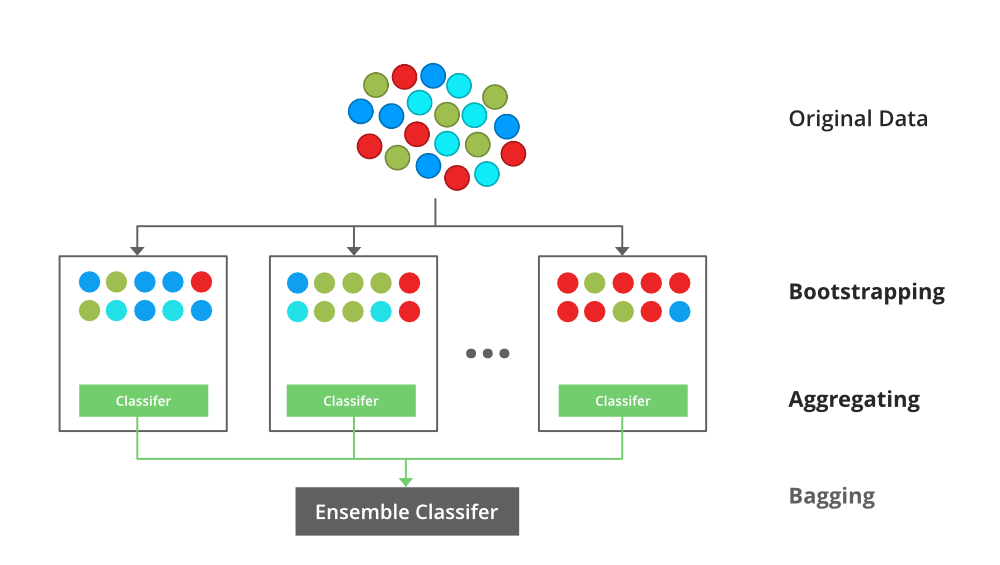

---

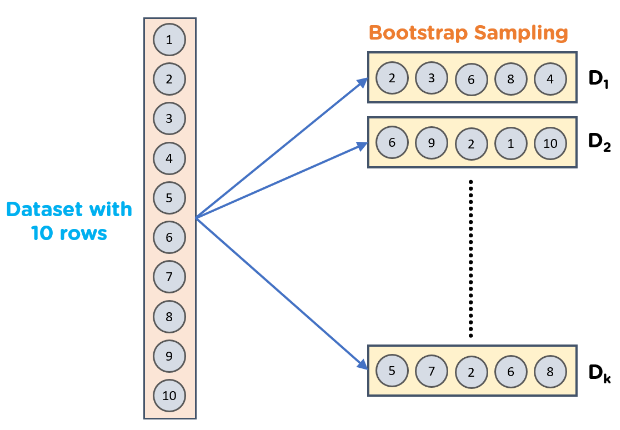

### Bagging implementation steps


Step 1: Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.

Step 2: A base model is created on each of these subsets.

Step 3: Each model is learned in parallel with each training set and independent of each other.

Step 4: The final predictions are determined by combining the predictions from all the models.

In [29]:
import pandas as pd
import numpy as np

In [53]:
df=pd.read_csv('diabetes.csv')

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
df.shape

(768, 9)

In [56]:
# convert to int
df['BMI']= df['BMI'].astype(int)
df['DiabetesPedigreeFunction']= df['DiabetesPedigreeFunction'].astype(int)

In [57]:
X=df.drop('Outcome',axis=1)

In [58]:
y=df['Outcome']

### Split Training and Test Data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [68]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [69]:
y_pred=rf.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       130
           1       0.67      0.58      0.62        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



## Hyperparameter Tuning

## 1. oob_score 

Random forests select decision trees via bagging, meaning that samples are selected with replacement. After all of the samples have been chosen, some samples should remain that have not been chosen.

It's possible to hold back these samples as the test set. After the model is fit on one tree, the model can immediately be scored against this test set. When the hyperparameter is set to oob_score=True, this is exactly what happens.

In other words, oob_score provides a shortcut to get a test score. oob_score may be printed out immediately after the model has been fit.

Since we are using oob_score to test the model, it's not necessary to split the data into a training set and test set.

In [16]:
rf = RandomForestClassifier(oob_score=True, n_estimators=20, random_state=42, n_jobs=-1)

In [17]:
rf.fit(X,y)

RandomForestClassifier(n_estimators=20, n_jobs=-1, oob_score=True,
                       random_state=42)

In [18]:
rf.oob_score_

0.7369791666666666

## 2. n_estimators

Random forests are powerful when there are many trees in the forest. How many is enough?

Recently, scikit-learn defaults changed from 10 to 100. While 100 trees may be enough to cut down on variance and obtain good scores, for larger datasets, 500 or more trees may be required.

In [19]:
### Let's start with n_estimators=50 to see how oob_score changes:

rf = RandomForestClassifier(n_estimators=80, oob_score=True, random_state=2, n_jobs=-1)

rf.fit(X, y)

rf.oob_score_

0.7526041666666666

In [20]:
## how about 150 trees?

rf = RandomForestClassifier(n_estimators=150, oob_score=True, random_state=2, n_jobs=-1)

rf.fit(X, y)

rf.oob_score_

0.7643229166666666

#### As n_estimators continues to rise, scores will eventually level off.

## 3 warm_start

The warm_start hyperparameter is great for determining the number of trees in the forest (n_estimators). When warm_start=True, adding more trees does not require starting over from scratch. If you change n_estimators from 100 to 200, it may take twice as long to build the forest with 200 trees. When warm_start=True, the random forest with 200 trees does not start from scratch, but rather starts where the previous model stopped.

warm_start may be used to plot various scores with a range of n_estimators.

As an example, the following code takes increments of 50 trees, starting with 50 and ending at 500, to display a range of scores. This code may take time to run as it is building 10 random forests by adding 50 new trees each round! The code is broken down in the following steps:

In [21]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

In [22]:
oob_scores = []

rf = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs=-1, random_state=42)

In [23]:
rf.fit(X, y)

oob_scores.append(rf.oob_score_)

Prepare a list of estimators that contains the number of trees starting with 50:

In [24]:
est = 50

estimators=[est]

Write a for loop that adds 50 trees each round. For each round, add 50 to est, append est to the estimators list, change n_estimators with rf.set_params(n_estimators=est), fit the random forest on the data, then append the new oob_score_:

In [25]:
for i in range(9):
    est += 50
    estimators.append(est)

    rf.set_params(n_estimators=est)

    rf.fit(X, y)

    oob_scores.append(rf.oob_score_)

Show a larger graph, then plot the estimators and oob_scores. Add the appropriate labels, then save and show the graph:

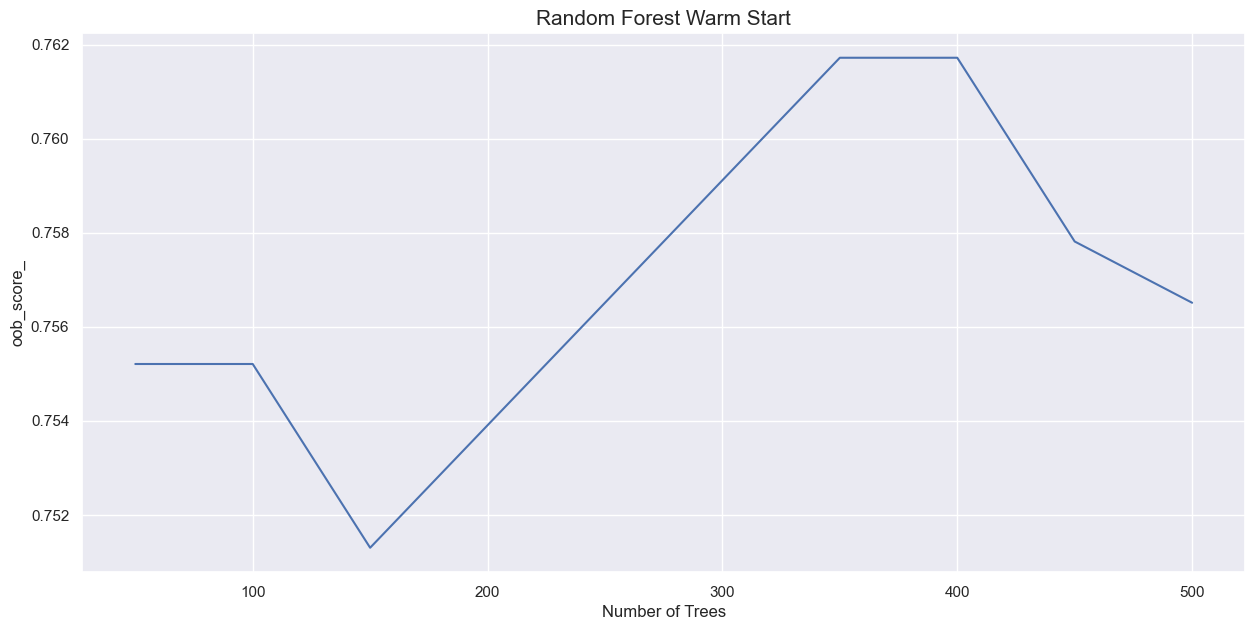

In [26]:
plt.figure(figsize=(15,7))

plt.plot(estimators, oob_scores)

plt.xlabel('Number of Trees')

plt.ylabel('oob_score_')

plt.title('Random Forest Warm Start', fontsize=15)

plt.savefig('Random_Forest_Warm_Start', dpi=325)

plt.show()

As you can see, the number of trees tends to peak at around 150. It's more costly and time-consuming to use more trees than 350, and the gains are minimal at best.

## 4. bootstrap
Although random forests are traditionally bootstrapped, the bootstrap hyperparameter may be set to False. If bootstrap=False, oob_score cannot be included since oob_score is only possible when samples have been left out.

We will not pursue this option, although it makes sense if underfitting occurs.

### 5.Verbose
The verbose hyperparameter may be changed to a higher number to display more information when building a model. You may try it on your own for experimentation. When building large models, verbose=1 may provide helpful information along the way.

## Hyperparameters from Decision trees that can also be used

### 6.max_depth
The hyperparameters that fall under this category are:

max_depth: Always good to tune. Determines the number of times splits occur. Known as the length of the tree. A great way to reduce variance.

## 7.Splits

The hyperparameters that fall under this category are:

max_features: Limits the number of features to choose from when making splits.

min_samples_split: Increases the number of samples required for new splits.

min_impurity_decrease: Limits splits to decrease impurity greater than the set threshold.

## 8.Leaves
The hyperparameters that fall under this category are:

min_samples_leaf: Increases the minimum number of samples required for a node to be a leaf.

min_weight_fraction_leaf: The fraction of the total weights required to be a leaf.

## Remaning Task[Actual Hyperparameter Tuning]#
https://learning.oreilly.com/library/view/hands-on-gradient-boosting/9781839218354/B15551_03_Final_NM_ePUB.xhtml

## Cross Validation :K-fold

The technique of cross validation (CV) is best explained by example using the most common method, K-Fold CV.

When we approach a machine learning problem, we make sure to split our data into a training and a testing set. 

In K-Fold CV, we further split our training set into K number of subsets, called folds. We then iteratively fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold (called the validation data).

As an example, consider fitting a model with K = 5. The first iteration we train on the first four folds and evaluate on the fifth. The second time we train on the first, second, third, and fifth fold and evaluate on the fourth. We repeat this procedure 3 more times, each time evaluating on a different fold. At the very end of training, we average the performance on each of the folds to come up with final validation metrics for the model.

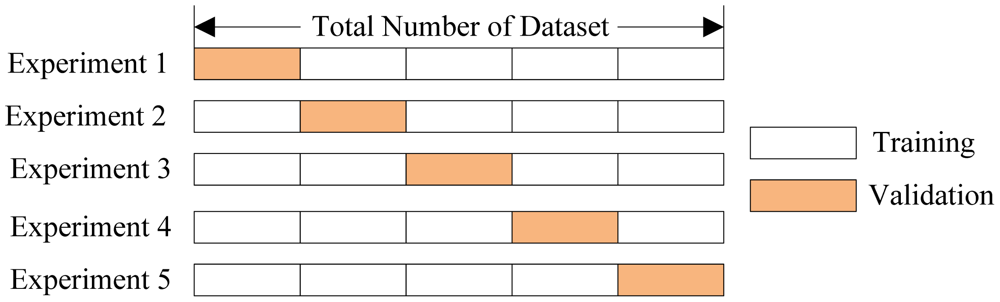

## Random HyperParameterGrid

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\ngugi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [41]:
score_df = pd.DataFrame(rf_random.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.511404,0.015229,0.046015,0.004633,200,4,1,sqrt,30,False,"{'n_estimators': 200, 'min_samples_split': 4, ...",0.703125,0.770833,0.739583,0.737847,0.027669,88
1,0.537924,0.006748,0.045047,0.004949,200,3,3,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 3, ...",0.734375,0.770833,0.729167,0.744792,0.018537,42
2,0.511029,0.044992,0.038383,0.005269,200,6,3,sqrt,110,True,"{'n_estimators': 200, 'min_samples_split': 6, ...",0.739583,0.760417,0.739583,0.746528,0.009821,31
3,5.027202,0.019739,0.086747,0.003384,400,6,4,auto,110,True,"{'n_estimators': 400, 'min_samples_split': 6, ...",0.750000,0.760417,0.729167,0.746528,0.012992,40
4,1.822982,0.020425,0.165203,0.002618,1000,3,5,sqrt,None,False,"{'n_estimators': 1000, 'min_samples_split': 3,...",0.734375,0.807292,0.734375,0.758681,0.034373,2


In [42]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='auto',
                       min_samples_leaf=5, min_samples_split=6,
                       n_estimators=1800)

## Pass in new parameters

In [48]:
rf=RandomForestClassifier(random_state=42,n_estimators=1800,n_jobs=-1,max_depth=100, min_samples_leaf=5,bootstrap=False,max_features='auto')

In [49]:
rf.fit(X_train,y_train)

C:\Users\ngugi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=100, max_features='auto',
                       min_samples_leaf=5, n_estimators=1800, n_jobs=-1,
                       random_state=42)

In [50]:
y_pred=rf.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.70      0.60      0.64        62

    accuracy                           0.79       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192

